# ZigZag Indicator - Tutorial

This notebook demonstrates how to use the **ZigZag** indicator from the `pandas-ti` library. ZigZag identifies significant price reversal points, filtering out minor movements.

## 1. Import Libraries

Import all necessary libraries for the analysis.

In [102]:
import pandas_ti
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf
from typing import Literal

## 2. Load Market Data

Download historical price data using `yfinance`.

In [103]:
ticker = 'REP.MC'
df = yf.Ticker(ticker).history(period='2y', interval='1d', rounding=True)[['Open', 'High', 'Low', 'Close', 'Volume']]
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-11-27 00:00:00+01:00,12.16,12.33,12.12,12.21,3465926
2023-11-28 00:00:00+01:00,12.18,12.28,12.16,12.26,2748352
2023-11-29 00:00:00+01:00,12.17,12.26,12.14,12.14,2881238
2023-11-30 00:00:00+01:00,12.24,12.50,12.16,12.16,9089639
2023-12-01 00:00:00+01:00,12.22,12.30,12.18,12.28,2729083
...,...,...,...,...,...
2025-11-21 00:00:00+01:00,16.00,16.00,15.48,15.70,6529312
2025-11-24 00:00:00+01:00,15.67,15.68,15.35,15.60,8692825
2025-11-25 00:00:00+01:00,15.60,15.77,15.48,15.56,3024011


## 3. Using the ZigZag Indicator

ZigZag is implemented as a **stateful class** (`ZigZagClass`) that processes real-time data. This allows:
- Updating the indicator candle by candle
- Maintaining confirmed pivots and candidates
- Accessing internal state at any time

### Main Parameters:
- **`pct`**: Minimum percentage change required to confirm a pivot (e.g., 0.05 = 5%)
- **`debug`**: If `True`, stores detailed internal state information

### 3.1. Import the ZigZag Class

In [104]:
from pandas_ti.indicators_dataframe.ZigZag import ZigZagClass

### 3.2. Create Instance and Process Data

Create an instance with `pct=0.1` (10% minimum change) and `debug=True` to see internal details. Then iterate over each DataFrame row to update the indicator.

In [105]:
# Create ZigZag instance with 10% threshold
zz = ZigZagClass(pct=0.1, debug=True)

# Process each candle in the DataFrame
for idx, row in df.iterrows():
    high, low = row['High'], row['Low']
    zz.update(high=high, low=low, idx=idx)

# Add pivots column to the original DataFrame
df['zigzag'] = zz.pivots()

# Visualize detected pivots
df['zigzag'].dropna()

Date
2023-12-13 00:00:00+01:00    11.40
2024-04-05 00:00:00+02:00    14.47
2024-12-20 00:00:00+01:00    10.04
2025-02-20 00:00:00+01:00    12.66
2025-03-14 00:00:00+01:00    10.99
2025-03-28 00:00:00+01:00    12.13
2025-04-09 00:00:00+02:00     9.05
2025-04-10 00:00:00+02:00    10.58
2025-04-11 00:00:00+02:00     9.18
2025-09-26 00:00:00+02:00    15.70
2025-10-17 00:00:00+02:00    13.96
2025-11-17 00:00:00+01:00    17.15
2025-11-24 00:00:00+01:00    15.35
Name: zigzag, dtype: float64

## 4. ZigZag Class Methods

The `ZigZagClass` provides several methods to access the processed data:

### 4.1. Method `.df()` - Complete DataFrame

Returns a DataFrame with all historical processed data. Only **confirmed** pivots have non-NaN values in the `ZigZag` and `type` columns.

In [106]:
# View all processed data
print('All processed data:')
display(zz.df().tail(10))

# Filter only confirmed pivots (no NaN)
print('\nConfirmed ZigZag Pivots:')
zz.df().dropna()

All processed data:


,High,Low,ZigZag,type
index,,,,
2025-11-14 00:00:00+01:00,17.06,16.67,NaN,NaN
2025-11-17 00:00:00+01:00,17.15,16.92,17.15,High
2025-11-18 00:00:00+01:00,16.80,16.53,NaN,NaN
2025-11-19 00:00:00+01:00,17.06,16.22,NaN,NaN
2025-11-20 00:00:00+01:00,16.55,16.29,NaN,NaN
2025-11-21 00:00:00+01:00,16.00,15.48,NaN,NaN
2025-11-24 00:00:00+01:00,15.68,15.35,NaN,NaN
2025-11-25 00:00:00+01:00,15.77,15.48,NaN,NaN
2025-11-26 00:00:00+01:00,15.74,15.57,NaN,NaN



Confirmed ZigZag Pivots:


,High,Low,ZigZag,type
index,,,,
2023-12-13 00:00:00+01:00,11.62,11.40,11.40,Low
2024-04-05 00:00:00+02:00,14.47,14.30,14.47,High
2024-12-20 00:00:00+01:00,10.22,10.04,10.04,Low
2025-02-20 00:00:00+01:00,12.66,11.85,12.66,High
2025-03-14 00:00:00+01:00,11.18,10.99,10.99,Low
2025-03-28 00:00:00+01:00,12.13,11.93,12.13,High
2025-04-09 00:00:00+02:00,9.33,9.05,9.05,Low
2025-04-10 00:00:00+02:00,10.58,9.38,10.58,High
2025-04-11 00:00:00+02:00,9.39,9.18,9.18,Low


### 4.2. Candidate Pivot (Not Confirmed)

ZigZag maintains a **candidate pivot** which is the most recent potential reversal point. This pivot is only confirmed when price moves sufficiently in the opposite direction.

You can access the candidate through:
- `zz.candidate_idx`: Temporal index of the candidate pivot
- `zz.candidate_price`: Price of the candidate pivot

In [107]:
print('Candidate Pivot (not yet confirmed):')
print(f'  Index: {zz.candidate_idx}')
print(f'  Price: {zz.candidate_price:.2f}')

Candidate Pivot (not yet confirmed):
  Index: 2025-11-24 00:00:00+01:00
  Price: 15.35


### 4.3. Method `.pivots()`

The `.pivots()` method returns a Series with **all pivots, including the current candidate**. This is useful for real-time visualization.

In [108]:
print('All ZigZag Pivots (confirmed + candidate):')
zz.pivots().dropna()

All ZigZag Pivots (confirmed + candidate):


2023-12-13 00:00:00+01:00    11.40
2024-04-05 00:00:00+02:00    14.47
2024-12-20 00:00:00+01:00    10.04
2025-02-20 00:00:00+01:00    12.66
2025-03-14 00:00:00+01:00    10.99
2025-03-28 00:00:00+01:00    12.13
2025-04-09 00:00:00+02:00     9.05
2025-04-10 00:00:00+02:00    10.58
2025-04-11 00:00:00+02:00     9.18
2025-09-26 00:00:00+02:00    15.70
2025-10-17 00:00:00+02:00    13.96
2025-11-17 00:00:00+01:00    17.15
2025-11-24 00:00:00+01:00    15.35
dtype: float64

## 5. Visualization with mplfinance

Now visualize the candlestick chart along with the detected ZigZag pivots.

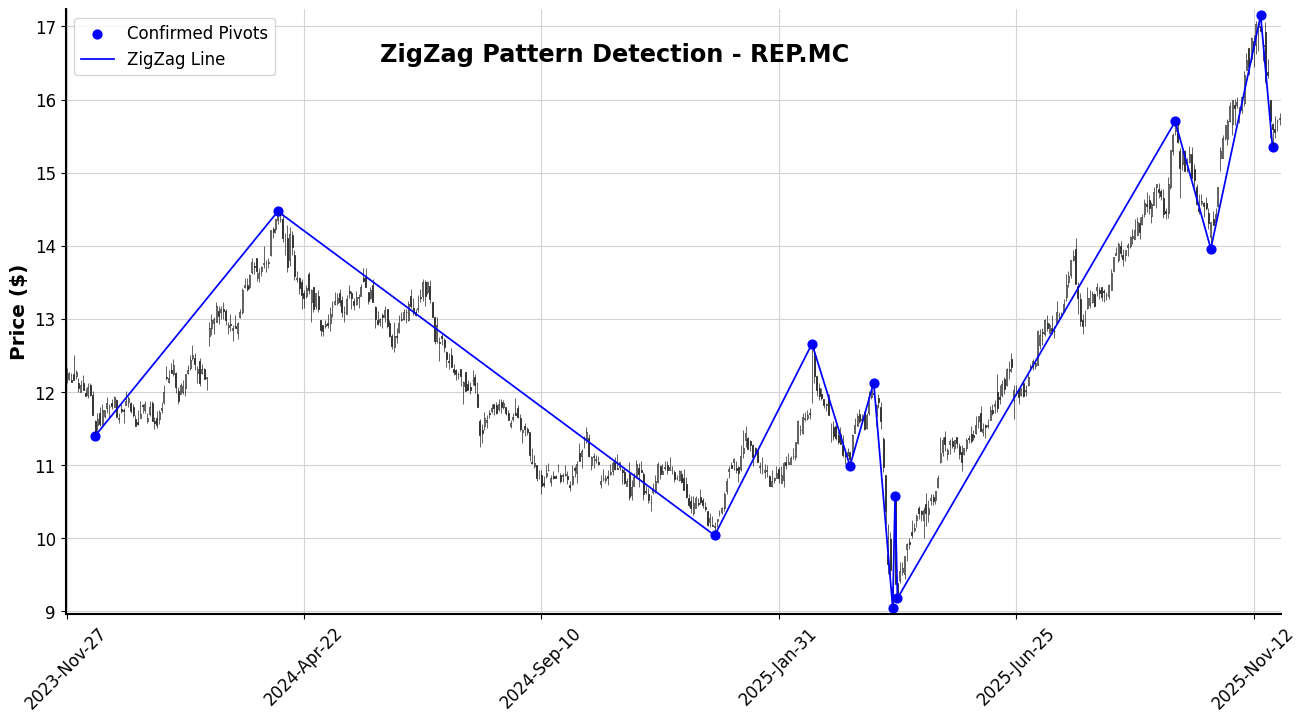

In [ ]:
# Configure custom chart style
my_style = mpf.make_mpf_style(
    base_mpf_style='classic',
    facecolor='white',
    gridcolor='lightgray',
    gridstyle='-',
    y_on_right=False,
    rc={
        'axes.edgecolor': 'black',
        'axes.spines.top': False,
        'axes.spines.right': False
    }
)

# Interpolate to create continuous ZigZag line
df['zigzag_filled'] = df['zigzag'].interpolate(method='linear', limit_area='inside')

# Prepare additional plots
apds = [
    mpf.make_addplot(
        df['zigzag'],
        type='scatter',
        color='blue',
        marker='o',
        markersize=40,
        label='Confirmed Pivots'
    ),
    mpf.make_addplot(
        df['zigzag_filled'],
        type='line',
        color='blue',
        linestyle='-',
        label='ZigZag Line'
    )
]

# Create the chart
mpf.plot(
    df,
    type='candle',
    addplot=apds,
    style=my_style,
    title=f"ZigZag Pattern Detection - {ticker}",
    ylabel='Price',
    figsize=(14, 7),
    volume=False,
    tight_layout=True
)

## 6. Advanced Usage: ZigZag with Smoothing (SMA)

ZigZag can be applied to smoothed prices to reduce noise and obtain more significant pivots.

In [110]:
# Create a new DataFrame
df3 = yf.Ticker(ticker).history(period='2y', interval='1d')[['Open', 'High', 'Low', 'Close', 'Volume']]

# Apply SMA smoothing to High and Low prices
df3['High_SMA3'] = df3['High'].ti.SMA(n=3)
df3['Low_SMA3'] = df3['Low'].ti.SMA(n=3)

# Apply ZigZag on smoothed prices
df3['zigzag'] = df3.ti.ZigZag(High=df3['High_SMA3'], Low=df3['Low_SMA3'], pct=0.1)

print(f'Pivots detected with smoothing: {df3["zigzag"].notna().sum()}')
df3['zigzag'].dropna()

Pivots detected with smoothing: 6


Date
2023-12-15 00:00:00+01:00    11.462229
2024-04-09 00:00:00+02:00    14.453218
2024-12-23 00:00:00+01:00    10.122934
2025-02-24 00:00:00+01:00    12.498969
2025-04-11 00:00:00+02:00     9.200830
2025-11-17 00:00:00+01:00    17.095000
Name: zigzag, dtype: float64

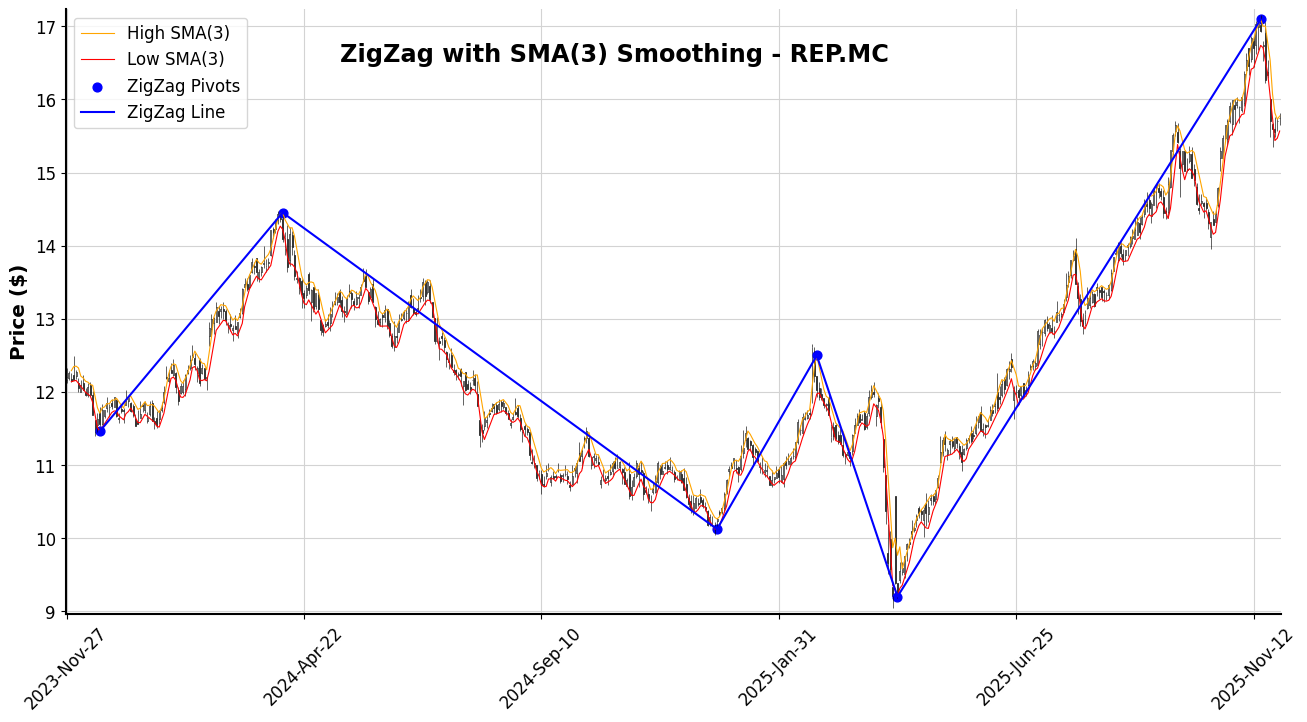

In [ ]:
# Visualize ZigZag with smoothing
df3['zigzag_filled'] = df3['zigzag'].interpolate(method='linear', limit_area='inside')

apds = [
    mpf.make_addplot(
        df3['High_SMA3'], 
        type='line', 
        color='orange', 
        linestyle='-', 
        label='High SMA(3)',
        width=0.8
    ),
    mpf.make_addplot(
        df3['Low_SMA3'], 
        type='line', 
        color='red', 
        linestyle='-', 
        label='Low SMA(3)',
        width=0.8
    ),
    mpf.make_addplot(
        df3['zigzag'], 
        type='scatter', 
        color='blue', 
        marker='o', 
        markersize=40,
        label='ZigZag Pivots'
    ),
    mpf.make_addplot(
        df3['zigzag_filled'], 
        type='line', 
        color='blue', 
        linestyle='-',
        width=1.5,
        label='ZigZag Line'
    )
]

mpf.plot(
    df3, 
    type='candle', 
    addplot=apds, 
    style=my_style, 
    title=f"ZigZag with SMA(3) Smoothing - {ticker}", 
    ylabel='Price', 
    figsize=(14, 7), 
    volume=False, 
    tight_layout=True
)